


# **CPE019 : Saving Models**


---


**Name:** QUEJADO,  Jimlord M. <br>
**Course and Section:** CPE019-CPE32S3 <br>
**Date of Submission**: April 16, 2024<br>
**Instructor:** Engr. Roman Richard<br>

---



# **About The Data**:

## **Raisin Data Set**


Images of the Kecimen and Besni raisin varieties were captured using a CVS (Computer Vision System) that was donated on August 13,2023. A total of 900 raisins were utilized, **evenly split with 450 from each variety**. Subsequently, 7 distinct morphological features were extracted from these raisins. This features will be used to train the model inorder to predict the type of raisin. <br>

**The data set has 2 classes**:  

0: Kecimen <br>
1: Besni

**The features and description are as follows:**
1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.


---

## **Dataset Characteristics**<br>

- Multivariate<br>

## **Subject Area**<br>
- Biology<br>

## **Associated Tasks**<br>
- Classification<br>

## **Feature Type**<br>
- Real, Integer<br>

## **\# Instances**<br>
- 900<br>

## **\# Features**<br>
- 7<br>

---

## DOI
- 10.24432/C5660T
## Link
- https://www.youtube.com/watch?v=_HZM0QiuUS8

#Loading The Data

In this section, the model was loaded via importing it using the ucimlrepo. The code fetched the code and split the features and target on X and y respectively.

In [ ]:
!pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
raisin = fetch_ucirepo(id=850)

# data (as pandas dataframes)
X = raisin.data.features
y = raisin.data.targets

# metadata
print(raisin.metadata)

# variable information
print(raisin.variables)


{'uci_id': 850, 'name': 'Raisin', 'repository_url': 'https://archive.ics.uci.edu/dataset/850/raisin', 'data_url': 'https://archive.ics.uci.edu/static/public/850/data.csv', 'abstract': 'Images of the Kecimen and Besni raisin varieties were obtained with CVS. A total of 900 raisins were used, including 450 from both varieties, and 7 morphological features were extracted.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 900, 'num_features': 7, 'feature_types': ['Real', 'Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Jan 05 2024', 'dataset_doi': '10.24432/C5660T', 'creators': ['İ̇lkay Çinar', 'Murat Koklu', 'Sakir Tasdemir'], 'intro_paper': {'title': 'Kuru Üzüm Tanelerinin Makine Görüşü ve Yapay Zeka Yöntemleri Kullanılarak Sınıflandırılması', 'authors': 'İ̇lkay Çinar, Murat Koklu, Sakir Tasdemir

# **Pre Processing of Data**

In this section, the data was preprocessed inorder to prepare it for the model training. The following tasks were done:

1. Understanding the data
2. Coverting of target Variable
3. Checking for Null Valies
4. Checking for Outliers
5. Standardization of Data
6. Feature Selection

In [ ]:
import numpy as np
import pandas as pd

#### Understanding the data

Basic exploration of data was done in this section. the following tasks were performed:

1. checking if the data is properly loaded using .head()
2. checking the dimensions of the data frames
3. checking the info of each columns
4. Checking the unique values of the target variable

In [ ]:
X.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [ ]:
y.head()

,Class
0,Kecimen
1,Kecimen
2,Kecimen
3,Kecimen
4,Kecimen


In [ ]:
X.shape

(900, 7)

In [ ]:
y.shape

(900, 1)

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.3 KB


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Class   900 non-null    object
dtypes: object(1)
memory usage: 7.2+ KB


In [ ]:
unique_values = y['Class'].unique()
print(unique_values)

['Kecimen' 'Besni']


##### Remarks:

There are only two target variables, the next goal would be converting this to binary classifcation 0 for Kecimen and 1 for Besni.

### Converting Target variables

In this section, instead of using a one hot encoder, I used a simple one liner lambda function to convert the target variable into 0 and 1.

In [ ]:
#Converting the target variables to binary

y['Class']= y['Class'].apply(lambda x: 0 if x == 'Kecimen' else 1)


<ipython-input-4-bc5ed035bce9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Class']= y['Class'].apply(lambda x: 0 if x == 'Kecimen' else 1)


In [ ]:
#checking
unique_values = y['Class'].unique()
print(unique_values)

[0 1]


### Checking for Null Values

Although the null values are already checked using the .info() earlier, to make sure that each data is complete, a null value checking was performed.

In [ ]:
X.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
dtype: int64

### Checking for outliers

In this section, outliers were checked and removed.

In [ ]:
X.describe()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,87804.127778,430.929950,254.488133,0.781542,91186.090000,0.699508,1165.906636
std,39002.111390,116.035121,49.988902,0.090318,40769.290132,0.053468,273.764315
min,25387.000000,225.629541,143.710872,0.348730,26139.000000,0.379856,619.074000
25%,59348.000000,345.442898,219.111126,0.741766,61513.250000,0.670869,966.410750
50%,78902.000000,407.803951,247.848409,0.798846,81651.000000,0.707367,1119.509000
75%,105028.250000,494.187014,279.888575,0.842571,108375.750000,0.734991,1308.389750
max,235047.000000,997.291941,492.275279,0.962124,278217.000000,0.835455,2697.753000


#### Remarks:

As shown in the results above, the minimumum and the maximum  has a large difference compared to the 25% and 75% quartile respectively. This proves the presence of an outlier. To visualize the outliers, a box plot will be performed.



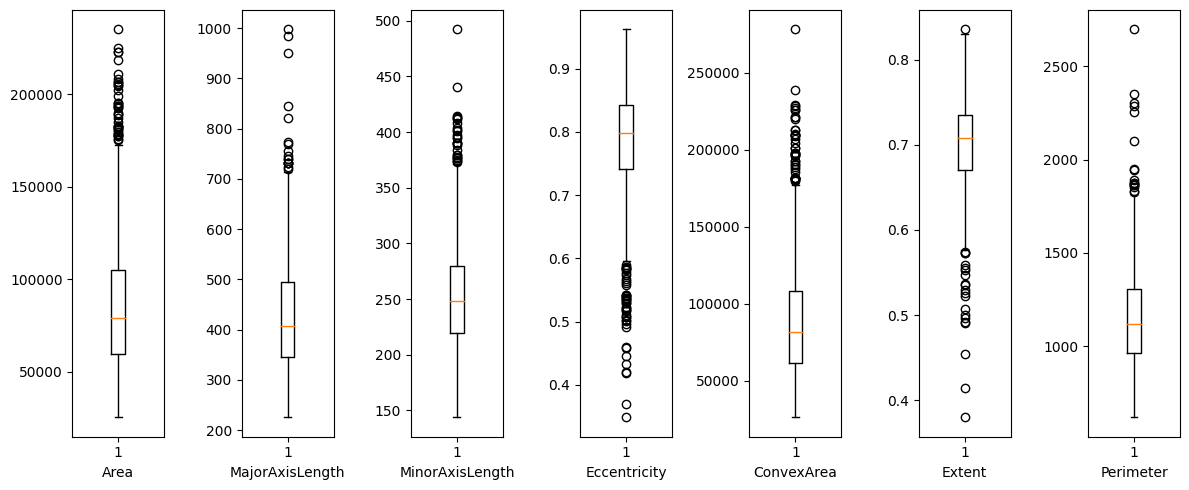

In [ ]:
import matplotlib.pyplot as plt

# Specify the columns you want to include
selected_columns = ['Area',	'MajorAxisLength',	'MinorAxisLength',	'Eccentricity',	'ConvexArea',	'Extent',	'Perimeter']

# Filter the DataFrame to include only the selected columns
X_selected = X[selected_columns]

# Create subplots
fig, axs = plt.subplots(1, len(selected_columns), figsize=(12, 5))

# Plot boxplots for each selected column
for i, col in enumerate(selected_columns):
    axs[i].boxplot(X_selected[col])
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
def IQR_outliers(df, column_name, thresh=1.5):
  Q1 = df[column_name].quantile(0.25)
  Q3 = df[column_name].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - (thresh * IQR)
  upper_bound = Q3 + (thresh * IQR)

  return df[(df[column_name] >= lower_bound) & (df [column_name] <= upper_bound)]

In [ ]:
# Selected columns for analysis
selected_columns = ['Area',	'MajorAxisLength',	'MinorAxisLength',	'Eccentricity',	'ConvexArea',	'Extent',	'Perimeter']

# Remove outliers from selected columns
indices_to_keep = np.array([]) # Store indices of rows to keep in X
for col in selected_columns:
    outliers_removed_X = IQR_outliers(X, col)
    indices_to_keep = np.intersect1d(indices_to_keep, outliers_removed_X.index) if indices_to_keep.size else outliers_removed_X.index

# Filter X and y with the indices to keep
X = X.loc[indices_to_keep]
y = y.loc[indices_to_keep]

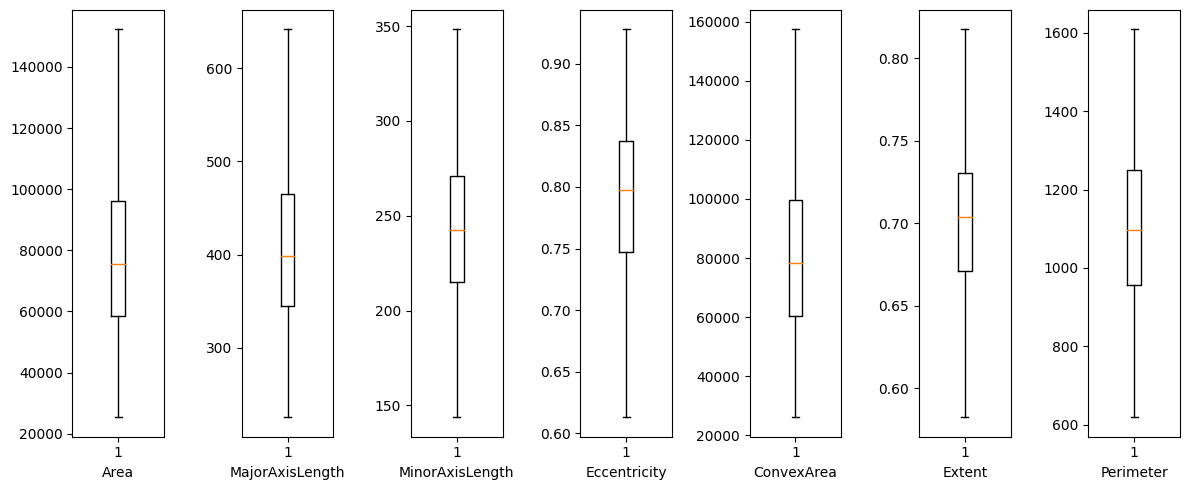

In [ ]:
selected_columns = ['Area',	'MajorAxisLength',	'MinorAxisLength',	'Eccentricity',	'ConvexArea',	'Extent',	'Perimeter']
# Create subplots
fig, axs = plt.subplots(1, len(selected_columns), figsize=(12, 5))

# Plot boxplots for each selected column
for i, col in enumerate(selected_columns):
    axs[i].boxplot(X[col])
    axs[i].set_xlabel(col)

plt.tight_layout()
plt.show()

In [ ]:
X.shape, y.shape

((748, 7), (748, 1))

Remarks:

After performing outlier detection and removal, 152 outliers are removed from the data set.

### Standardization of Data

In this section, standard scaler was used to transform the features to a standardized values.

In [ ]:
from sklearn.preprocessing import StandardScaler

normalize = StandardScaler()
X_norm = normalize.fit_transform(X)

## Feature Selection


In order to determine the relevant features, a random forest classifier will be performed and the top 4 features will be used.

<ipython-input-23-414ff9afbccb>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_norm, y)


Feature ranking:
1. Feature 6 (0.2435150583592718)
2. Feature 1 (0.22282845787573705)
3. Feature 4 (0.1533217685936459)
4. Feature 0 (0.12891841691003586)
5. Feature 3 (0.09524548132864506)
6. Feature 2 (0.08613434516640577)
7. Feature 5 (0.07003647176625864)


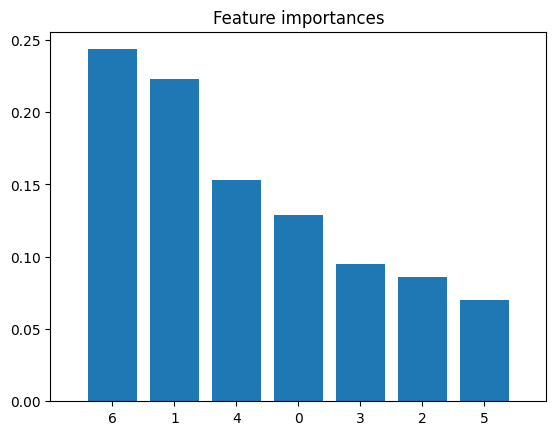

Top 4 features: [6 1 4 0]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the data
clf.fit(X_norm, y)

# Get feature importances
importances = clf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(7):
    print(f"{f + 1}. Feature {indices[f]} ({importances[indices[f]]})")

# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(7), importances[indices], align="center")
plt.xticks(range(7), indices)
plt.xlim([-1,7])
plt.show()

# Select the top k features (e.g., top 4 features)
k = 4
top_k_features = indices[:k]
print(f"Top {k} features: {top_k_features}")

In [ ]:
#New Features

X = X_norm[:,[0,1,4,6]]

print(X)


[[ 0.31404927  0.38097045  0.30713976  0.36104809]
 [-0.14585464 -0.03796935 -0.11671868  0.05101724]
 [ 0.43804991  0.38121832  0.42145932  0.48323472]
 ...
 [ 0.7655798   0.2567916   0.8737985   0.90282269]
 [ 0.53730252  0.78273992  0.56335834  0.73210502]
 [ 0.2427824   1.20382838  0.25850617  0.80339011]]


### Remarks:

As shown the top 4 features are 0, 1, 4, and 6. These features will be used in the model training. In the a trial code that was created prior to the following model creations in the activity, it showed that using all the features resulted to patterns not being learned. Therefore, performing a feature importance is a must and as shown in the next lines of code, the model performed significantly better compared to the trial code.

# Creating the Model

In [ ]:
from keras.models  import Sequential
from keras.layers import Input, Dense
from keras.optimizers import SGD

In [ ]:
model = Sequential([
            Dense(4, activation='relu', input_shape=(X.shape[1],)),
            Dense(3, activation='relu', input_shape=(X.shape[1],)),
            Dense(1, activation='sigmoid')
        ])

optimizer = SGD(learning_rate = 0.02)
model.compile(optimizer= optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X,y, epochs=150, batch_size=32, verbose=0)
# evaluate the model
scores = model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 84.63%


# Tasks:
Perform the following tasks:
1. Save a model in HDF5 format
2. Save a model and load the model in a JSON format
3. Save a model and load the model in a YAML format
4. Checkpoint Neural Network Model Improvements
5. Checkpoint Best Neural Network Model only
6. Load a saved Neural Network model
7. Visualize Model Training History in Keras
8. Show the application of Dropout Regularization
9. Show the application of Dropout on the visible layer
10. Show the application of Dropout on the hidden layer
11. Show the application of a time-based learning rate schedule
12. Show the application of a drop-based learning rate schedule


## 1. Save a model in HDF5 Format

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install h5py

In [ ]:
#Method 1:

model.save("/content/drive/MyDrive/CPE018 - Assignment 8.1 / model.h5")
print("Saved model to disk")


# Method 2:
model.save_weights("/content/drive/MyDrive/CPE018 - Assignment 8.1 / model.h5")
print("Saved model to disk")




Saved model to disk


### **Proof:**

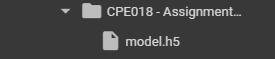

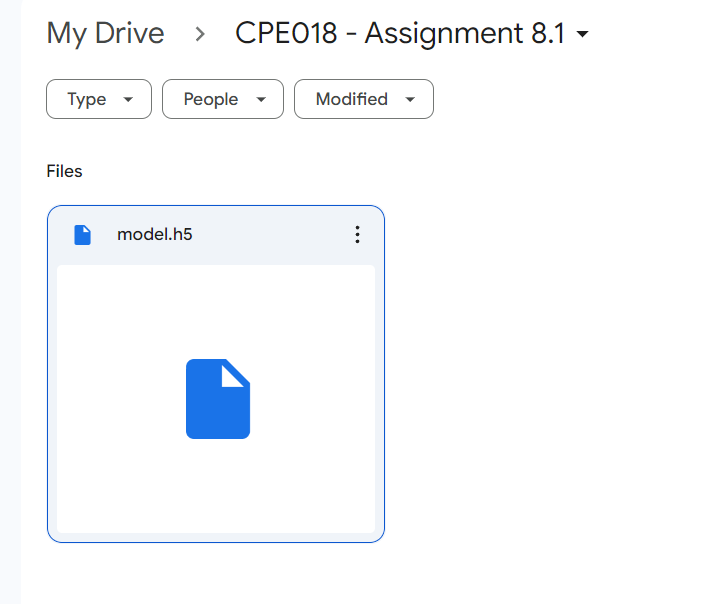



### Remarks and Observations:

The code shows two different ways to save a model. The first one is saving a model using save() function where it saves the entire model. On the other hand, the other code saves only the weights of the model to a HDF5 file. If the goal is to save the wntire model, method 1 should be used as it encompases all the architecture, weights and training configurations. On the other hand, if the only goal is to save a weight and be used as a manual checkpoint of the trained parameters of the model.


---

References:
- https://www.tensorflow.org/tutorials/keras/save_and_load
- https://ksingh7.medium.com/part-ii-converting-saving-keras-model-as-a-single-hdf5-h5-file-67d1fd50cc90

## 2. Save a model and load the model in a JSON format

In [ ]:
from tensorflow.keras.models import Sequential, model_from_json
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/CPE018 - Assignment 8.1 / model.h5")
print("Saved model to disk")


Saved model to disk


In [ ]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/CPE018 - Assignment 8.1 / model.h5")
print("Loaded model from disk")

Loaded model from disk


In [ ]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

accuracy: 86.36%


### **Remarks**:

In the screenshot above, the model was successfuly saved to .json file. This file format has the architecture of the model. By saving this model along with the weights stored in an h5 file format, combining these two will successully load the data. The json file extension enables the programmers to save the model to a readable code.



---
References:
- https://machinelearningmastery.com/save-load-keras-deep-learning-models/
- https://www.turing.com/kb/what-is-json

## 3. Save a model and load the model in a YAML format

In [ ]:
# serialize model to YAML
model_yaml = model.to_json()
with open("model.yaml", "w") as yaml_file:
    yaml_file.write(model_yaml)
# serialize weights to HDF5
model.save_weights("/content/drive/MyDrive/Colab Notebooks/model_yaml.h5")
print("Saved model to disk")

Saved model to disk


### **Proof:**

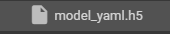

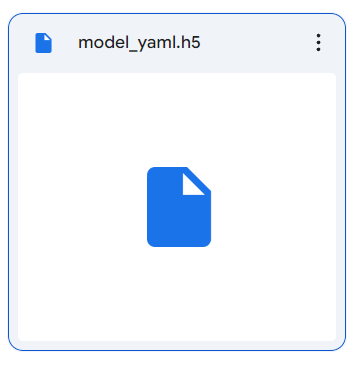

In [ ]:
from tensorflow.keras.models import Sequential, model_from_yaml

# load YAML and create model
yaml_file = open('model.yaml', 'r')
loaded_model_yaml = yaml_file.read()
yaml_file.close()
loaded_model = model_from_json(loaded_model_yaml)
# load weights into new model
loaded_model.load_weights("/content/drive/MyDrive/Colab Notebooks/model_yaml.h5")
print("Loaded model from disk")


Loaded model from disk


In [ ]:
# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, y, verbose=0)
print("YAML")
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

YAML
accuracy: 86.36%


### Remarks:

In this code, another file format was introduced, the YAML Ain't Markup Language (YAML) file format. It has the same function as the .json file, but their main difference is that yaml format is more readable as it is more similar to a Python code. The JSON file also is more secure and compact compared to YAML file.


---
**Refence:**
- https://ksingh7.medium.com/part-ii-converting-saving-keras-model-as-a-single-hdf5-h5-file-67d1fd50cc90
-https://www.cloudbees.com/blog/yaml-tutorial-everything-you-need-get-started
- https://www.snaplogic.com/blog/json-vs-yaml-whats-the-difference-and-which-one-is-right-for-your-enterprise

## 4. Checkpoint Neural Network Model Improvements

In [ ]:
from keras.callbacks import ModelCheckpoint
# checkpoint
filepath="weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


In [ ]:
# Fit the model
model.fit(X, y, validation_split=0.33, epochs=150, batch_size=32, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.69231, saving model to weights-improvement-01-0.69.hdf5

Epoch 2: val_accuracy did not improve from 0.69231


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_accuracy improved from 0.69231 to 0.72470, saving model to weights-improvement-03-0.72.hdf5

Epoch 4: val_accuracy did not improve from 0.72470

Epoch 5: val_accuracy did not improve from 0.72470

Epoch 6: val_accuracy did not improve from 0.72470

Epoch 7: val_accuracy did not improve from 0.72470

Epoch 8: val_accuracy did not improve from 0.72470

Epoch 9: val_accuracy did not improve from 0.72470

Epoch 10: val_accuracy did not improve from 0.72470

Epoch 11: val_accuracy did not improve from 0.72470

Epoch 12: val_accuracy improved from 0.72470 to 0.78138, saving model to weights-improvement-12-0.78.hdf5

Epoch 13: val_accuracy did not improve from 0.78138

Epoch 14: val_accuracy did not improve from 0.78138

Epoch 15: val_accuracy did not improve from 0.78138

Epoch 16: val_accuracy did not improve from 0.78138

Epoch 17: val_accuracy did not improve from 0.78138

Epoch 18: val_accuracy did not improve from 0.78138

Epoch 19: val_accuracy did not improve from 0.7813

### **Proof:**

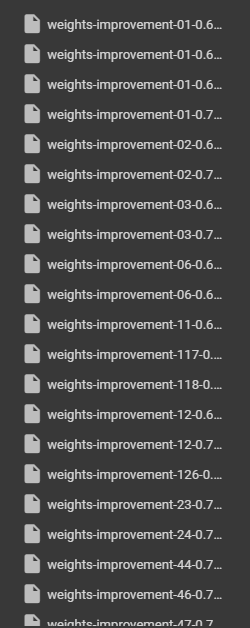

### **Remarks**

The code basically saves a weight of the model to HDF5 file. It will only save a file or a checkpoint if only there is an improvement in the performance of the model.


---
Reference:
- https://machinelearningmastery.com/check-point-deep-learning-models-keras/#:~:text=Checkpoint%20Neural%20Network%20Model%20Improvements,of%20diabetes%20binary%20classification%20problem.



## 5. Checkpoint Best Neural Network Model only

In [ ]:
# checkpoint
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]


In [ ]:
# Fit the model
model.fit(X, y, validation_split=0.33, epochs=150, batch_size=32, callbacks=callbacks_list, verbose=0)


Epoch 1: val_accuracy improved from -inf to 0.68421, saving model to weights.best.hdf5

Epoch 2: val_accuracy did not improve from 0.68421


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(



Epoch 3: val_accuracy did not improve from 0.68421

Epoch 4: val_accuracy did not improve from 0.68421

Epoch 5: val_accuracy did not improve from 0.68421

Epoch 6: val_accuracy improved from 0.68421 to 0.68826, saving model to weights.best.hdf5

Epoch 7: val_accuracy did not improve from 0.68826

Epoch 8: val_accuracy did not improve from 0.68826

Epoch 9: val_accuracy did not improve from 0.68826

Epoch 10: val_accuracy did not improve from 0.68826

Epoch 11: val_accuracy did not improve from 0.68826

Epoch 12: val_accuracy did not improve from 0.68826

Epoch 13: val_accuracy did not improve from 0.68826

Epoch 14: val_accuracy improved from 0.68826 to 0.75709, saving model to weights.best.hdf5

Epoch 15: val_accuracy did not improve from 0.75709

Epoch 16: val_accuracy did not improve from 0.75709

Epoch 17: val_accuracy did not improve from 0.75709

Epoch 18: val_accuracy did not improve from 0.75709

Epoch 19: val_accuracy did not improve from 0.75709

Epoch 20: val_accuracy did 

### **Proof:**

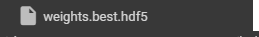

### **Remarks:**

In this code, it works similary on the previous code, but the difference is that it only saves the best weight that was generated. This is very useful when experementing about the accuracy of the model as it saves and can be rerun later if needed.

---
Reference: <br>

- https://machinelearningmastery.com/check-point-deep-learning-models-keras/#:~:text=Checkpoint%20Neural%20Network%20Model%20Improvements,of%20diabetes%20binary%20classification%20problem.

## 6. Load a saved Neural Network model

In [ ]:
# creating the model

model = Sequential()
model.add(Dense(4, input_dim=4, kernel_initializer = 'uniform' , activation= 'relu' ))
model.add(Dense(3, kernel_initializer= 'uniform' , activation= 'relu' ))
model.add(Dense(1, kernel_initializer= 'uniform' , activation= 'sigmoid' ))

model.load_weights("weights.best.hdf5")

model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
print("Created model and loaded weights from file")

Created model and loaded weights from file


### Remarks:

The model was successfully loaded the `weights.best.hdf5` file. This shows that the weights that was saved was applied on the model. This shows the importance of saving the best weights for experimenting as it gives an access to the best weights that was used to produce a better performing model



## 7. Visualize Model Training History in Keras

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(42)

#splitting the data set to have the same sets if other parameters are changed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


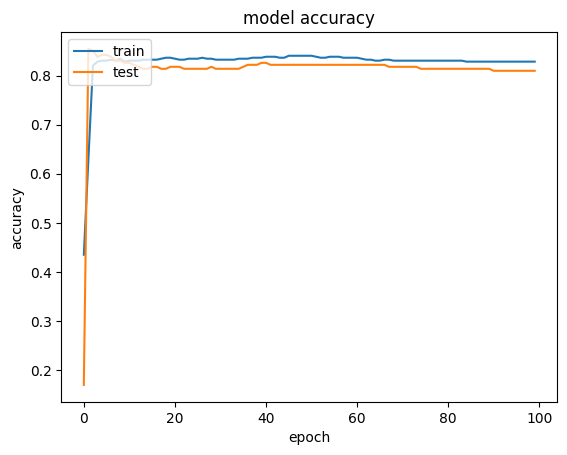

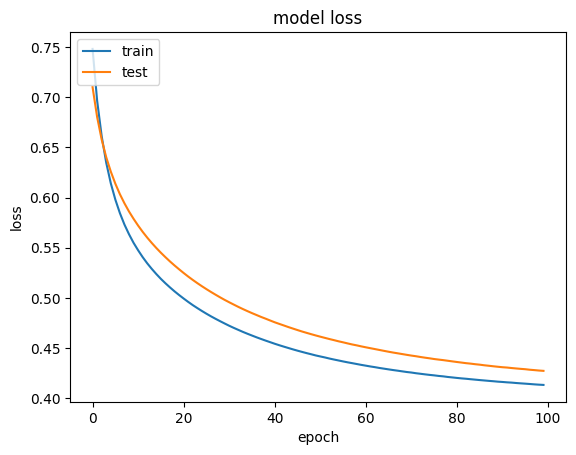

In [ ]:
from keras.optimizers import SGD

model = Sequential([
            Dense(4, activation='relu', input_shape=(X.shape[1],)),
            Dense(3, activation='relu'),
            Dense(1, activation='sigmoid')
        ])

optimizer = SGD(learning_rate = 0.009

                )
model.compile(optimizer= optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=100, batch_size=32, verbose=0)

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Print accuracy and loss
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Training Accuracy: {train_accuracy:.4f}, Training Loss: {train_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")

Training Accuracy: 0.8283, Training Loss: 0.4132
Test Accuracy: 0.8097, Test Loss: 0.4275


### Remarks:

In this code, the history of the model training was visualized. It is important to do this as it enables the programmer determine whether the model is learning or not, if it is overfit underfit or even an indicator of a good model. The model was ensured that it is good fit. Although the accuracy is around 82 percent, this model shows the goal of the task which is to visualize the training history in keras. Addtionally, this will also serve as a base model to compare the effect of dropout regularization in the suceeding cells.



---
**Reference:**
- https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/



## 8. Show the application of Dropout Regularization

In this section, a basic application of dropout regularization was applied. A simple hidden layer droupout was added in the model that was created earlier.

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(42)

#splitting the data set to have the same sets if other parameters are changed
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from keras.optimizers import SGD
from keras.layers import Dropout

model2 = Sequential([
            Dense(4, activation='relu', input_shape=(4,)),
            Dropout(0.05),
            Dense(3, activation='relu'),
            Dense(1, activation='sigmoid')
        ])

optimizer = SGD(learning_rate = 0.009)

model2.compile(optimizer= optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history2 = model2.fit(X_train2, y_train2, validation_data=(X_test2,y_test2), epochs=100, batch_size=32, verbose=0)

# Print accuracy and loss
train_loss, train_accuracy = model2.evaluate(X_train2, y_train2, verbose=0)
test_loss, test_accuracy = model2.evaluate(X_test2, y_test2, verbose=0)
print(f"Training Accuracy: {train_accuracy:.4f}, Training Loss: {train_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")


Training Accuracy: 0.8303, Training Loss: 0.4395
Test Accuracy: 0.8138, Test Loss: 0.4552


### Remarks:
The droupout regularization was implemeted as a hidden layer in the code which shows the basic application of a dropout regularization. In comparison to the previously created model, the accuracy and loss of both data frames resulted to a better performance compared to the base model. This is because the dropout regularization helps in preventing overfit and improves the model's generilazation capability.



---
**references:**
- https://saturncloud.io/glossary/dropout-regularization/#:~:text=Importance,training%20data%2C%20thereby%20preventing%20overfitting.


## 9. Show the application of Dropout on the visible layer


In [ ]:
from keras.optimizers import SGD
from keras.layers import Dropout

model3 = Sequential([
            Dropout(0.05, input_shape=(4,)),
            Dense(4, activation='relu'),
            Dense(3, activation='relu'),
            Dense(1, activation='sigmoid')
        ])

optimizer = SGD(learning_rate = 0.009,momentum = 0.9)

model3.compile(optimizer= optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history3 = model3.fit(X_train2, y_train2, validation_data=(X_test2,y_test2), epochs=100, batch_size=32, verbose=0)

# Print accuracy and loss
train_loss, train_accuracy = model3.evaluate(X_train2, y_train2, verbose=0)
test_loss, test_accuracy = model3.evaluate(X_test2, y_test2, verbose=0)
print(f"Training Accuracy: {train_accuracy:.4f}, Training Loss: {train_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")


Training Accuracy: 0.8483, Training Loss: 0.3522
Test Accuracy: 0.8381, Test Loss: 0.3543


### Remarks:

The dropout regularization rate that was used in this code that gave a better performance is 5%. Upong evaluating the model, it resulted to better performance compared to the previous implementation. This could means that adding a droupout on a visible layer affects the model perfomance

## 10. Show the application of Dropout on the hidden layer


In [ ]:
from keras.optimizers import SGD
from keras.layers import Dropout

model4 = Sequential([
            Dense(4, activation='relu', input_shape=(4,)),
            Dense(3, activation='relu'),
            Dropout(0.05),
            Dense(1, activation='sigmoid')
        ])

optimizer = SGD(learning_rate = 0.009,momentum = 0.9)

model4.compile(optimizer= optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history4 = model4.fit(X_train2, y_train2, validation_data=(X_test2,y_test2), epochs=100, batch_size=32, verbose=0)

# Print accuracy and loss
train_loss, train_accuracy = model4.evaluate(X_train2, y_train2, verbose=0)
test_loss, test_accuracy = model4.evaluate(X_test2, y_test2, verbose=0)
print(f"Training Accuracy: {train_accuracy:.4f}, Training Loss: {train_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}, Test Loss: {test_loss:.4f}")


Training Accuracy: 0.8623, Training Loss: 0.3311
Test Accuracy: 0.8421, Test Loss: 0.3506


### Remarks:

In this case, a dropout regularization layer was added before the output layer. This resulted to the best performance in comparison to other models that was previously created. This does not mean that it will always work on other data set but specifically only on this data set.

## 11. Show the application of a time-based learning rate schedule


In [ ]:
from tensorflow.keras.optimizers.legacy import SGD
from keras.layers import Dropout

model5 = Sequential([
            Dense(4, activation='relu', input_shape=(4,)),
            Dense(3, activation='relu'),
            Dropout(0.05),
            Dense(1, activation='sigmoid')
        ])

#The time-based learning rate schedule:
epochs = 100
learning_rate = 0.009
decay_rate = learning_rate / epochs
momentum = 0.9
optimizer =  SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

#compiling the model:
model5.compile(optimizer= optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

history5 = model5.fit(X_train2, y_train2, validation_data=(X_test2,y_test2), epochs=epochs, batch_size=32, verbose=2)



Epoch 1/100
16/16 - 3s - loss: 0.6729 - accuracy: 0.5409 - val_loss: 0.6113 - val_accuracy: 0.7733 - 3s/epoch - 173ms/step
Epoch 2/100
16/16 - 0s - loss: 0.5580 - accuracy: 0.7784 - val_loss: 0.5498 - val_accuracy: 0.8057 - 201ms/epoch - 13ms/step
Epoch 3/100
16/16 - 0s - loss: 0.5092 - accuracy: 0.8084 - val_loss: 0.5125 - val_accuracy: 0.8097 - 233ms/epoch - 15ms/step
Epoch 4/100
16/16 - 0s - loss: 0.4835 - accuracy: 0.8343 - val_loss: 0.4889 - val_accuracy: 0.8057 - 262ms/epoch - 16ms/step
Epoch 5/100
16/16 - 0s - loss: 0.4591 - accuracy: 0.8244 - val_loss: 0.4717 - val_accuracy: 0.8097 - 136ms/epoch - 8ms/step
Epoch 6/100
16/16 - 0s - loss: 0.4508 - accuracy: 0.8303 - val_loss: 0.4579 - val_accuracy: 0.8097 - 305ms/epoch - 19ms/step
Epoch 7/100
16/16 - 0s - loss: 0.4420 - accuracy: 0.8303 - val_loss: 0.4486 - val_accuracy: 0.8219 - 268ms/epoch - 17ms/step
Epoch 8/100
16/16 - 0s - loss: 0.4320 - accuracy: 0.8263 - val_loss: 0.4404 - val_accuracy: 0.8219 - 234ms/epoch - 15ms/step
Epo

### Remarks:

In this code, it shows the basic application of a time-based learning rate schedule or decay schedule. The time-based learning rate basically adjusts the learning rate at every epoch. This is done inorder to fine tune the model effectively instead of manually doing it over and over.

---
**Reference:**
- https://medium.com/@brijesh_soni/unlocking-the-secrets-of-the-learning-rate-a-beginner-friendly-guide-to-optimizing-machine-4a8cbab413b2#:~:text=Types%20of%20learning%20rate,-There%20are%20several&text=Time-based%20learning%20rate%3A%20The,1%20%2B%20decay_rate%20*%20epoch)%20.

- https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

- https://arxiv.org/pdf/2110.14109.pdf

## 12. Show the application of a drop-based learning rate schedule

In [ ]:
# learning rate schedule
def step_decay(epoch):
	initial_lrate = 0.1
	drop = 0.5
	epochs_drop = 10.0
	lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
	return lrate


In [ ]:
from tensorflow.keras.optimizers.legacy import SGD
from keras.layers import Dropout
from tensorflow.keras.callbacks import LearningRateScheduler
import math

model6 = Sequential([
            Dense(4, activation='relu', input_shape=(4,)),
            Dense(3, activation='relu'),
            Dropout(0.05),
            Dense(1, activation='sigmoid')
        ])

# Compile model
optimizer = SGD(learning_rate=0.0, momentum=0.9)
model6.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# learning schedule callback
lrate = LearningRateScheduler(step_decay)
callbacks_list = [lrate]


history6 = model6.fit(X_train2, y_train2, validation_data=(X_test2,y_test2), epochs=100, batch_size=32, callbacks=callbacks_list, verbose=2)


Epoch 1/100
16/16 - 1s - loss: 0.5593 - accuracy: 0.7864 - val_loss: 0.4438 - val_accuracy: 0.8219 - lr: 0.1000 - 1s/epoch - 64ms/step
Epoch 2/100
16/16 - 0s - loss: 0.4851 - accuracy: 0.7824 - val_loss: 0.4216 - val_accuracy: 0.8340 - lr: 0.1000 - 65ms/epoch - 4ms/step
Epoch 3/100
16/16 - 0s - loss: 0.4445 - accuracy: 0.8084 - val_loss: 0.3924 - val_accuracy: 0.8340 - lr: 0.1000 - 64ms/epoch - 4ms/step
Epoch 4/100
16/16 - 0s - loss: 0.4351 - accuracy: 0.8104 - val_loss: 0.3755 - val_accuracy: 0.8583 - lr: 0.1000 - 84ms/epoch - 5ms/step
Epoch 5/100
16/16 - 0s - loss: 0.3906 - accuracy: 0.8283 - val_loss: 0.3590 - val_accuracy: 0.8623 - lr: 0.1000 - 90ms/epoch - 6ms/step
Epoch 6/100
16/16 - 0s - loss: 0.4139 - accuracy: 0.8124 - val_loss: 0.3747 - val_accuracy: 0.8381 - lr: 0.1000 - 66ms/epoch - 4ms/step
Epoch 7/100
16/16 - 0s - loss: 0.3913 - accuracy: 0.8224 - val_loss: 0.3549 - val_accuracy: 0.8502 - lr: 0.1000 - 78ms/epoch - 5ms/step
Epoch 8/100
16/16 - 0s - loss: 0.3798 - accuracy:

### Remarks:

 The purpose of the code is similar to the time-based learning rate but the difference is that the dropping or adjustment of learning rate is done every certain number of epoch, in this case, 10 epoch. The advantage of this is that it really helps in improving the regularization of and generalization of the model.

 ---
 **References:**
 - https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1

 - https://medium.com/@immanobharathi21/understanding-time-based-vs-drop-based-learning-rate-schedules-631d1d7d24c2

# **CONCLUSION**


The activity aims to discuss how to save models, load it and visiualize the history of the model. It also discussed the dropout regularization and different approaches for learning rate fine tuning.

After the activity I conclude the following things:

- Saving the model helps a lot in ensuring that the model can be recreated and be used.
- JSON and YAML file extensions are the best used in saving the model as it is readable friendly and suitable for saving the model.
- Checkpoints are good to use to save the best weights for the model that imrove its performance.
- Visualization of the history tells a lot about the fit of the data and indicates whether the model is learning or not, overfit or underfit .
- Dropout regularization prevents overfitting and helps in making the generalization of the model better. Additionally, depending on the probability used, the effect would differ. In my case, 20% did not any do good thus adjusting it to 5% yielded to better results. Lastly, depending on the placement on the architecture, the effect to the performance would differ.
- The use of two methods: time-based learning rate schele and drop-based rate schedule helps a lot in fine tuning of the model where it improves the generalization of the model by forcing the model to learn from different weights.
